In [93]:
import numpy as np
import pandas as pd
from google.colab import drive
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [94]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Dataset_DesgasteEmpleados.csv")
data = np.array(data)
x = data[:,0]
y = data[:,1]
print(x)
print(y)
n_ejemplos = y.size

[41 49 37 ... 27 49 34]
['Yes' 'No' 'Yes' ... 'No' 'No' 'No']


In [96]:
def cambiarDatos(x, y):
  for i in range (n_ejemplos):
    if x[i] == "Travel_Rarely":
      x[i] = 2
    if x[i] == "Travel_Frequently":
      x[i] = 3
    if x[i] == "Non-Travel":
      x[i] = 1
    if x[i] == "Research & Development":
      x[i] = 1
    if x[i] == "Sales":
      x[i] = 2
    if x[i] == "Human Resources":
      x[i] = 3
    if x[i] == "Life Sciences":
      x[i] = 1
    if x[i] == "Medical":
      x[i] = 2
    if x[i] == "Marketing":
      x[i] = 3
    if x[i] == "Technical Degree":
      x[i] = 4
    if x[i] == "Other":
      x[i] = 5
    if x[i] == "Male":
      x[i] = 1
    if x[i] == "Female":
      x[i] = 2
    if x[i] == "Sales Executive":
      x[i] = 1
    if x[i] == "Research Scientist":
      x[i] = 2
    if x[i] == "Laboratory Technician":
      x[i] = 3
    if x[i] == "Manufacturing Director":
      x[i] = 4
    if x[i] == "Healthcare Representative":
      x[i] = 5
    if x[i] == "Manager":
      x[i] = 6
    if x[i] == "Research Director":
      x[i] = 7
    if x[i] == "Sales Representative":
      x[i] = 8
    if x[i] == "Single":
      x[i] = 1
    if x[i] == "Married":
      x[i] = 2
    if x[i] == "Divorced":
      x[i] = 3
    if x[i] == "Y":
      x[i] = 1
    if x[i] == "N":
      x[i] = 2
    if x[i] == "Yes":
      x[i] = 1
    if x[i] == "No":
      x[i] = 2
  for i in range (n_ejemplos):
    if y[i] == "Yes":
      y[i] = 2
    if y[i] == "No":
      y[i] = 1

In [97]:
cambiarDatos(x,y)
print(x,y)

[41 49 37 ... 27 49 34] [2 1 2 ... 1 1 1]


In [98]:
def graficar(x, y):
  pyplot.figure(figsize=(10,8))
  pyplot.plot(x, y, "yo", ms=5)
  pyplot.xlabel("Edad de los empleados")
  pyplot.ylabel("Desgaste laboral")

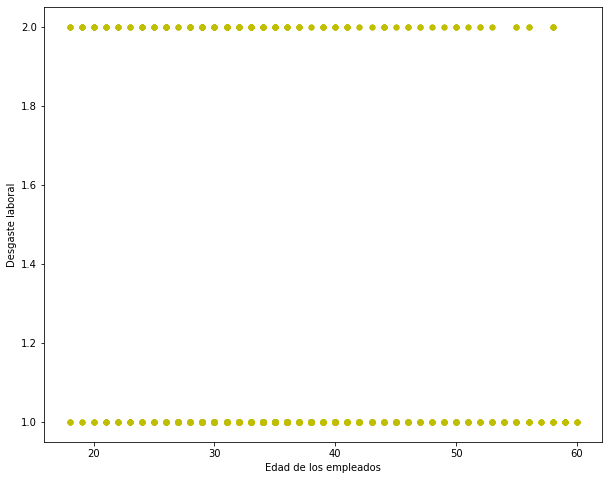

In [99]:
graficar(x, y)

In [100]:
x = np.stack((np.ones(n_ejemplos),x),axis=1)

In [101]:
def calcularCosto(x, y, theta):
  J = 0
  hipotesis = np.dot(x,theta)
  J = (1/(2*n_ejemplos))*np.sum(np.square((hipotesis)-y))
  return J

In [102]:
def descensoGradiente(x,y,theta,alpha,n_iteraciones):
  historial_J = []
  theta = theta.copy()
  for i in range(n_iteraciones):
    theta = theta-(alpha/n_ejemplos)*(np.dot(x,theta)-y).dot(x)
    historial_J.append(calcularCosto(x,y,theta))
  return theta, historial_J

In [103]:
def hallarTheta():
  theta = np.zeros(x.shape[1])
  n_iteraciones = 150000
  alpha = 0.001
  theta, historial_J = descensoGradiente(x,y,theta,alpha,n_iteraciones)
  return theta, historial_J

In [104]:
def graficarAjuste(x, y, theta):
  pyplot.figure(figsize=(10,8))
  pyplot.plot(x[:,1],y,"yo",ms=5)
  pyplot.plot(x[:,1],np.dot(x,theta),"r-")
  pyplot.xlabel("Edad de los empleados")
  pyplot.ylabel("Desgaste laboral")

Las thetas encontradas son:  [1.3976911885198626 -0.006404564436478709]
El menor costo que se pudo determinar fue de:  0.0659017783518645


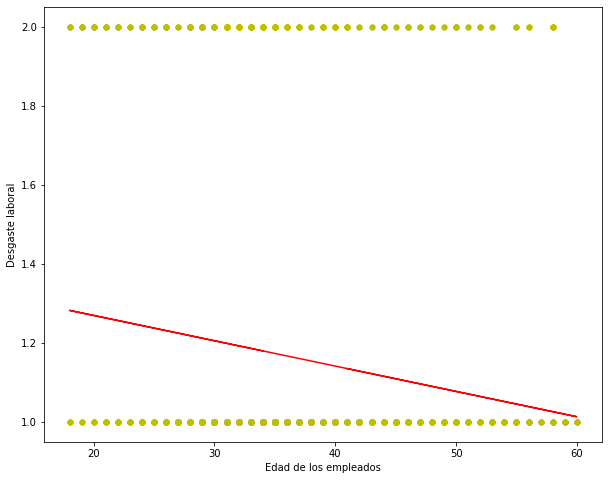

In [105]:
theta, historial_J = hallarTheta()
graficarAjuste(x,y,theta)
print("Las thetas encontradas son: ",theta)
print("El menor costo que se pudo determinar fue de: ",historial_J[-1])

In [114]:
def predecir(x):
  x_valor = x
  x = np.array(x)
  x = np.stack((np.ones(x.size),x),axis=1)
  y_predecir = np.dot(x,theta)
  print("La y predicha para un valor de x de ",x_valor[0]," es: ",y_predecir[0])

In [115]:
predecir([25])
predecir([55])

La y predicha para un valor de x de  25  es:  1.237577077607895
La y predicha para un valor de x de  55  es:  1.0454401445135337
